We can see here the data is of census and here we are trying to understand
the salary greater than or below 50k depending on few criterias such as education, occupation and etc, here we can see the data is of classification type,
so we will be using logistic regression further.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [20]:
cs=pd.read_csv('Census_data.csv')
cs

,Age,Work-Class,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
cs.columns.value_counts().sum()

15

In [22]:
cs.isnull().sum()

Age                 0
Work-Class          0
fnlwgt              0
Education           0
Education-number    0
Marital-Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital-Gain        0
Capital-Loss        0
Hours-per-week      0
Native-Country      0
Salary              0
dtype: int64

Here we see most of the values are into the categorical data, so we need to convert the data 
into numercial by using label encoder or one hot encoder, we will be using label encoder into our model.

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cs['Work-Class']=le.fit_transform(cs['Work-Class'])
cs['Education']=le.fit_transform(cs['Education'])
cs['Marital-Status']=le.fit_transform(cs['Marital-Status'])
cs['Occupation']=le.fit_transform(cs['Occupation'])
cs['Relationship']=le.fit_transform(cs['Relationship'])
cs['Race']=le.fit_transform(cs['Race'])
cs['Sex']=le.fit_transform(cs['Sex'])
cs['Native-Country']=le.fit_transform(cs['Native-Country'])
cs['Salary']=le.fit_transform(cs['Salary'])

In [24]:
cs

,Age,Work-Class,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [25]:
cs.describe()

,Age,Work-Class,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [26]:
cs.corr()

,Age,Work-Class,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Salary
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
Work-Class,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education-number,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital-Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


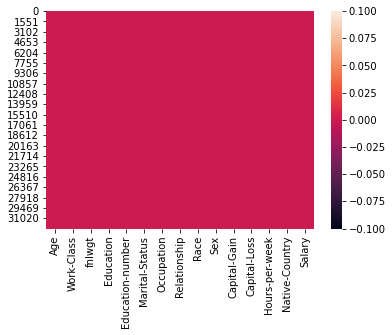

In [27]:
sns.heatmap(cs.isnull())

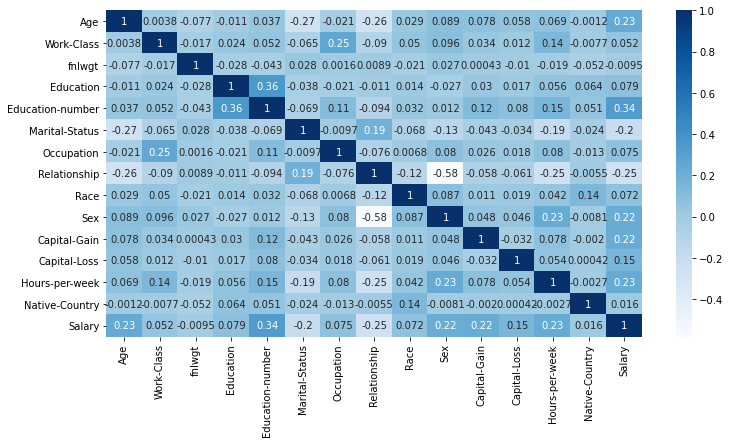

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(cs.corr(), cmap='Blues', annot=True)

In [29]:
cu=cs.drop(['fnlwgt','Race'], axis=1)

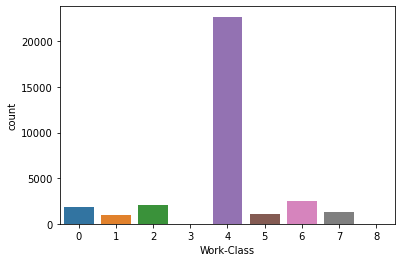

In [31]:
sns.countplot(x='Work-Class', data=cu)

In [32]:
cu.dtypes

Age                 int64
Work-Class          int32
Education           int32
Education-number    int64
Marital-Status      int32
Occupation          int32
Relationship        int32
Sex                 int32
Capital-Gain        int64
Capital-Loss        int64
Hours-per-week      int64
Native-Country      int32
Salary              int32
dtype: object

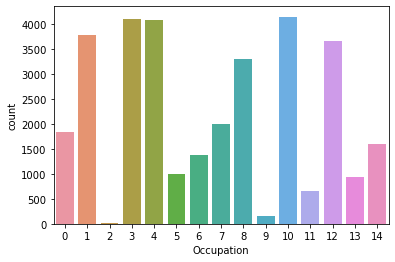

In [33]:
sns.countplot(x='Occupation', data=cu)

<Figure size 864x576 with 0 Axes>

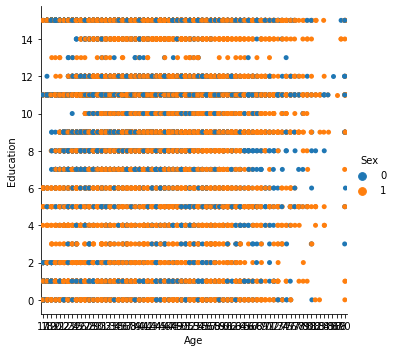

In [36]:
plt.figure(figsize=(12,8))
sns.catplot(x='Age', y='Education', hue='Sex', data=cu)

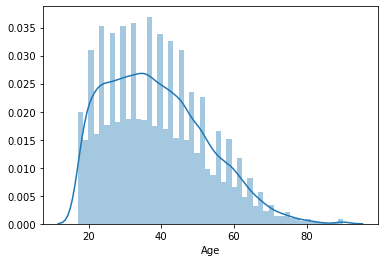

In [38]:
sns.distplot(cu['Age'])

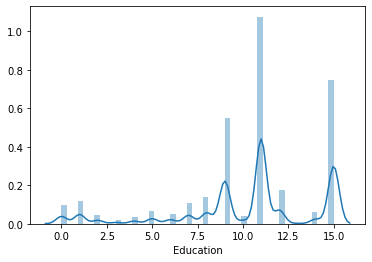

In [41]:
sns.distplot(cu['Education'])

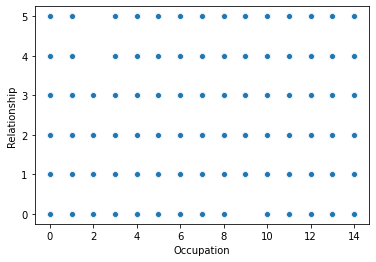

In [43]:
sns.scatterplot(x='Occupation', y='Relationship', data=cu)

In [44]:
cu.skew()

Age                  0.558743
Work-Class          -0.752024
Education           -0.934042
Education-number    -0.311676
Marital-Status      -0.013508
Occupation           0.114583
Relationship         0.786818
Sex                 -0.719293
Capital-Gain        11.953848
Capital-Loss         4.594629
Hours-per-week       0.227643
Native-Country      -3.658303
Salary               1.212430
dtype: float64

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

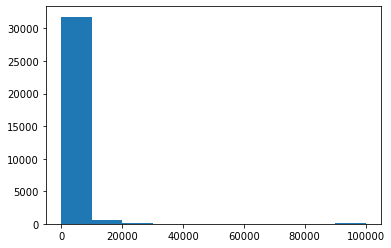

In [62]:
plt.hist(cu['Capital-Gain'], bins=10)

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

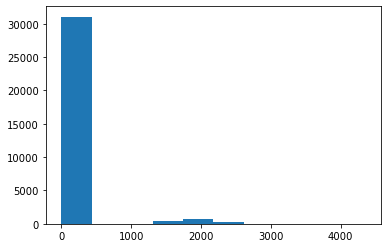

In [63]:
plt.hist(cu['Capital-Loss'], bins=10)

In [64]:
cn=cu.copy()

In [65]:
cn['Capital-Gain']=np.log1p(cn['Capital-Gain'])
cn['Native-Country']=((cn['Native-Country'])/20)**10

Now we need to check for the outliers and if any then remove them using zscore as they degrade the prediction of the model,
to removing them and cleaning the data is important

{'whiskers': [<matplotlib.lines.Line2D at 0x12c744f0>,
 'caps': [<matplotlib.lines.Line2D at 0x12c74bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c74190>],
 'medians': [<matplotlib.lines.Line2D at 0x12c7c2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c7c5b0>],
 'means': []}

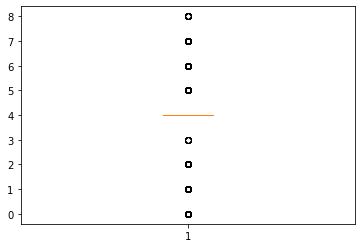

In [68]:
plt.boxplot(cn['Work-Class'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12cc7910>,
 'caps': [<matplotlib.lines.Line2D at 0x12cc7fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12cc75b0>],
 'medians': [<matplotlib.lines.Line2D at 0x12cd56d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12cd59d0>],
 'means': []}

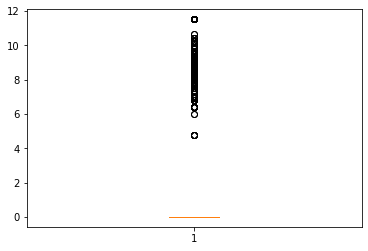

In [69]:
plt.boxplot(cn['Capital-Gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12d2a220>,
 'caps': [<matplotlib.lines.Line2D at 0x12d2a8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d1be80>],
 'medians': [<matplotlib.lines.Line2D at 0x12d2afa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d332e0>],
 'means': []}

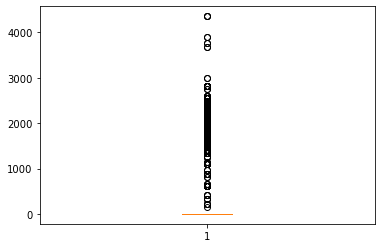

In [70]:
plt.boxplot(cn['Capital-Loss'])

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(cn))
cd=cn[(z<3).all(axis=1)]
cd

,Age,Work-Class,Education,Education-number,Marital-Status,Occupation,Relationship,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Salary
0,39,7,9,13,4,1,1,1,7.684784,0,40,794.961532,0
1,50,6,9,13,2,4,0,1,0.000000,0,13,794.961532,0
2,38,4,11,9,0,6,1,1,0.000000,0,40,794.961532,0
3,53,4,1,7,2,6,0,1,0.000000,0,40,794.961532,0
5,37,4,12,14,2,4,5,0,0.000000,0,40,794.961532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,15,10,4,11,1,1,0.000000,0,40,794.961532,0
32556,27,4,7,12,2,13,5,0,0.000000,0,38,794.961532,0
32557,40,4,11,9,2,7,0,1,0.000000,0,40,794.961532,1
32558,58,4,11,9,6,1,4,0,0.000000,0,40,794.961532,0


In [73]:
x=cd.iloc[:,0:-1]
y=cd.iloc[:,-1]

In [74]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
max_scr=0
for r_state in range(42,101):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=r_state, test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 82 to the r2 Score is 0.8305882352941176


In [76]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=82, test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
print('accuracy score',acc_scr)
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy score 0.8305882352941176
Confusion matrix [[16096   716]
 [ 2812  1201]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16812
           1       0.63      0.30      0.41      4013

    accuracy                           0.83     20825
   macro avg       0.74      0.63      0.65     20825
weighted avg       0.81      0.83      0.81     20825



In [77]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(lg,x,y,scoring='accuracy', cv=5).mean()
cross_val_scr

0.827520055045732

In [81]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
lg=LogisticRegression()
svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()

In [83]:
models=[]
models.append((lg,'LogisticRegression'))
models.append((svc,'svc'))
models.append((knn,'KNeighborsClassifier'))
models.append((dtc,'DecisionTreeClassifier'))
models.append((gnb,'GaussianNB'))

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

********** LogisticRegression *****************
Accuracy Score 0.8305882352941176


Cross_val_score 0.8276355918050365


roc_auc_score 0.6283443607229633


              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16812
           1       0.63      0.30      0.41      4013

    accuracy                           0.83     20825
   macro avg       0.74      0.63      0.65     20825
weighted avg       0.81      0.83      0.81     20825



Confusion_matrix [[16096   716]
 [ 2812  1201]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** svc *****************
Accuracy Score 0.8438895558223289


Cross_val_score 0.8463816416482695


roc_auc_score 0.6730066153072939


              precision    recall  f1-score   support

           0       0.87      0.95      0.91     16812
           1       0.66      0.39      0.49      4013

    accuracy                           0.84     20825
   macro avg       0.76      0.67      0.70     20825
weighted avg       0.83      0.84      0.83     20825



Confusion_matrix [[15989   823]
 [ 2428  1585]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** KNeighborsClassifier *****************
Accuracy Score 0.8297719087635054


Cross_val_score 0.8319380981297131


roc_auc_score 0.7047656916117077


              precision    recall  f1-score   support

           0       0.88      0.91      0.90     16812
           1       0.57      0.50      0.53      4013

    accuracy                           0.83     20825
   macro avg       0.72      0.70      0.71     20825
weighted avg       0.82      0.83      0.83     20825



Confusion_matrix [[15268  1544]
 [ 2001  2012]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** DecisionTreeClassifier *****************
Accuracy Score 0.805234093637455


Cross_val_score 0.803780480752151


roc_auc_score 0.6753400529293359


              precision    recall  f1-score   support

           0       0.87      0.89      0.88     16812
           1       0.49      0.46      0.48      4013

    accuracy                           0.81     20825
   macro avg       0.68      0.68      0.68     20825
weighted avg       0.80      0.81      0.80     20825



Confusion_matrix [[14907  1905]
 [ 2151  1862]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

No handles with labels found to put in legend.





********** GaussianNB *****************
Accuracy Score 0.288547418967587


Cross_val_score 0.7564153791589876


roc_auc_score 0.553955659156516


              precision    recall  f1-score   support

           0       0.97      0.12      0.22     16812
           1       0.21      0.99      0.35      4013

    accuracy                           0.29     20825
   macro avg       0.59      0.55      0.28     20825
weighted avg       0.83      0.29      0.24     20825



Confusion_matrix [[ 2053 14759]
 [   57  3956]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)




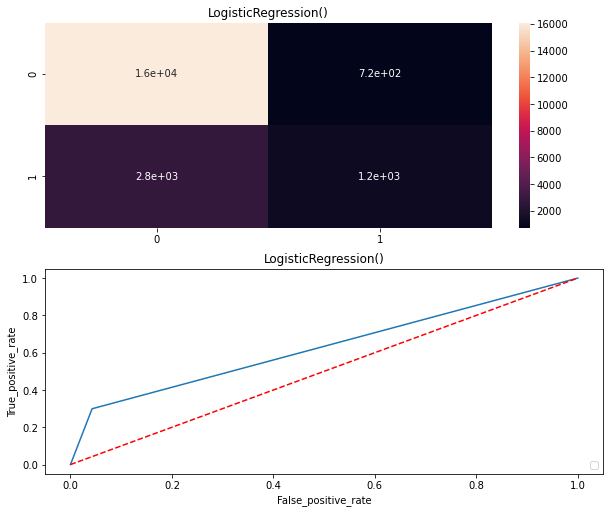

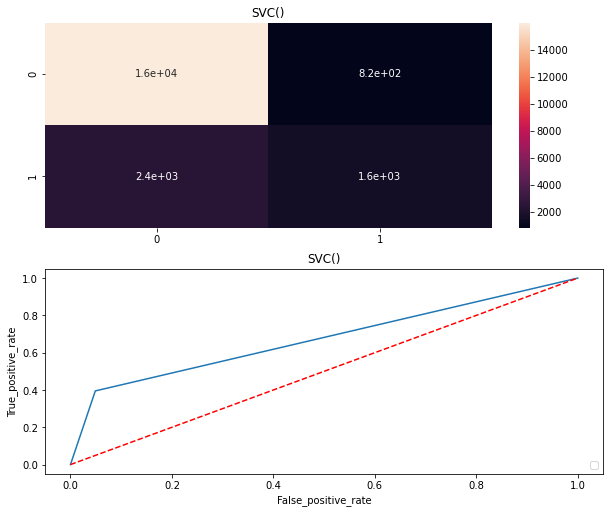

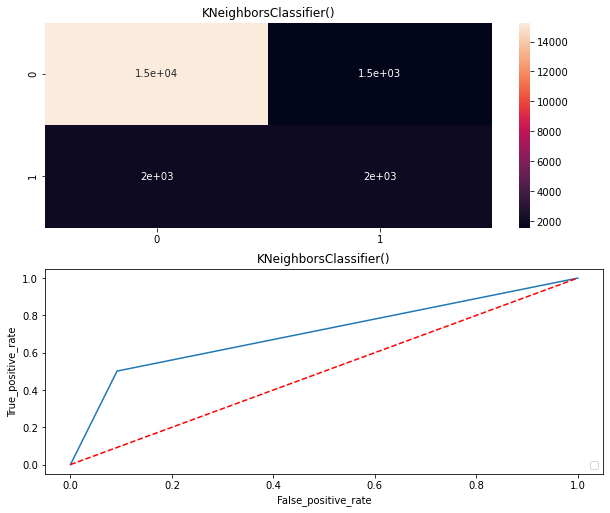

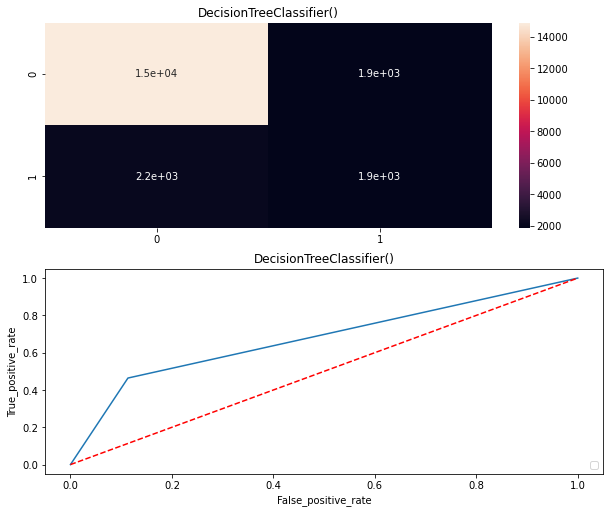

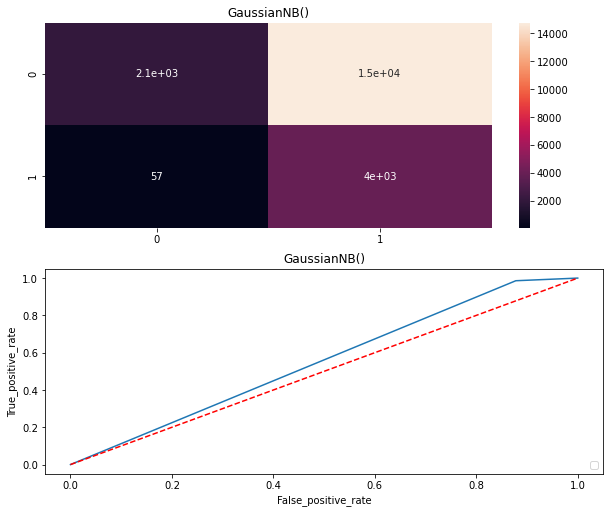

In [86]:
import warnings 
warnings.filterwarnings('ignore')
for m, model_name in models:
    print('**********',model_name,'*****************')
    m.fit(x_train,y_train)
    pred_y=m.predict(x_test)
    acc=accuracy_score(y_test,pred_y)
    print('Accuracy Score', acc)
    print('\n')
    csc=cross_val_score(m,x,y,cv=10, scoring='accuracy').mean()
    print('Cross_val_score', csc)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_y)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    print('\n')
    print(classification_report(y_test,pred_y))
    print('\n')
    cms=confusion_matrix(y_test,pred_y)
    print('Confusion_matrix',cms)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(m)
    print(sns.heatmap(cms,annot=True))
    plt.subplot(912)
    plt.title(m)
    plt.plot(false_positive_rate,true_positive_rate)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n')
    

In [87]:
df1=pd.DataFrame(pred_y)
df1.to_csv('svc_Census.csv')

In [88]:
import joblib
joblib.dump(svc,'svc_census.pkl')

['svc_census.pkl']

So we have saved the model in svc, as it has shown better and promising resutls and compare to other models.